# TP AIRBNB (LISTING.CSV)

#### Importation des packages utilisés

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

import joblib

#### Import de jeu de données

In [3]:
df = pd.read_csv("data/listings.csv.gz", compression='gzip')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20241206031559,2024-12-09,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN


#### Résumé des informations sur le DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91031 non-null  int64  
 1   listing_url                                   91031 non-null  object 
 2   scrape_id                                     91031 non-null  int64  
 3   last_scraped                                  91031 non-null  object 
 4   source                                        91031 non-null  object 
 5   name                                          91031 non-null  object 
 6   description                                   87540 non-null  object 
 7   neighborhood_overview                         45896 non-null  object 
 8   picture_url                                   91030 non-null  object 
 9   host_id                                       91031 non-null 

#### Supprésion des doublons

In [5]:
nb_doublons_initiaux = df.duplicated(subset="listing_url").sum()
print(f"Nombre de doublons avant suppression : {nb_doublons_initiaux}")

Nombre de doublons avant suppression : 0


#### Selection des colonnes

In [6]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "scrape_id", "last_scraped", "source", "name", "description", "neighborhood_overview", "picture_url", "host_id", "host_url", "host_name", "host_since", "host_location", "host_about", "host_response_time", "host_is_superhost", "host_thumbnail_url", "host_picture_url", 
    "host_neighbourhood", "host_listings_count", "host_total_listings_count", "host_verifications", 
    "host_has_profile_pic", "host_identity_verified", "neighbourhood", "neighbourhood_cleansed", 
    "neighbourhood_group_cleansed", "latitude", "longitude", "property_type", "room_type", "bedrooms", "amenities", "minimum_nights", "maximum_nights", "minimum_minimum_nights", "maximum_minimum_nights", 
    "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", 
    "maximum_nights_avg_ntm", "calendar_updated", "availability_30", "availability_60", "availability_90", "availability_365", "calendar_last_scraped", "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d", "first_review", 
    "last_review", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "license", "instant_bookable", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms"
]

# Suppression des colonnes
df_sans_colonnes = df.drop(columns=colonnes_a_supprimer)

# Affichage du résultat
print(f"Nous avons supprimé {len(colonnes_a_supprimer)} colonnes.")
print(f"Il reste {df_sans_colonnes.shape[1]} colonnes : {df_sans_colonnes.columns}  dans le DataFrame.")


Nous avons supprimé 63 colonnes.
Il reste 12 colonnes : Index(['id', 'listing_url', 'host_response_rate', 'host_acceptance_rate',
       'accommodates', 'bathrooms', 'bathrooms_text', 'beds', 'price',
       'has_availability', 'review_scores_rating', 'reviews_per_month'],
      dtype='object')  dans le DataFrame.


#### Suppréssion de données où la valeur est NaN

In [7]:
df_sans_nan = df.dropna(subset=["price", "beds", "bathrooms"])
nb_lignes_supprimees = len(df) - len(df_sans_nan)
print(f"Nombre de lignes supprimées : {nb_lignes_supprimees}")
# df[["listing_url", "beds"]][df.beds.isnull()]

Nombre de lignes supprimées : 31150


#### Remplacer la valeur NaN des colonnes manquantes par la moyenne

In [8]:
colonnes_manquantes = ['reviews_per_month', 'review_scores_rating']
df[colonnes_manquantes] = df[colonnes_manquantes].fillna(df[colonnes_manquantes].mean())

#### Conversion des colonnes

In [9]:
df["price"] = df["price"].astype(str).str.extract(r"(\d+)").astype(float)
df["bathrooms_text"] = df["bathrooms_text"].astype(str).str.extract(r"(\d+)").fillna(0).astype(float)
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str).str.replace("%", "").astype(float)
df["host_response_rate"] = df["host_response_rate"].astype(str).str.replace("%", "").astype(float)

#### Extraction et création d'une nouvelle colonne

In [10]:
df["TV"] = df.apply(lambda x: 1 if "tv" in str(x).lower() else 0)
df["Wifi"] = df.apply(lambda x: 1 if "wifi" in str(x).lower() else 0)
df["Dryer"] = df.apply(lambda x: 1 if "dryer" in str(x).lower() else 0)
df["Kitchen"] = df.apply(lambda x: 1 if "kitchen" in str(x).lower() else 0)


#### Statistiques générales

In [11]:
print("\n=== Statistiques descriptives ===")
print(df.describe().round(2))


=== Statistiques descriptives ===
                 id     scrape_id       host_id  host_response_rate  \
count  9.103100e+04  9.103100e+04  9.103100e+04            52210.00   
mean   6.081553e+17  2.024121e+13  1.818846e+08               92.18   
std    5.127971e+17  3.729000e+01  2.006094e+08               20.89   
min    3.109000e+03  2.024121e+13  2.626000e+03                0.00   
25%    3.233102e+07  2.024121e+13  1.956359e+07               97.00   
50%    8.113895e+17  2.024121e+13  7.262684e+07              100.00   
75%    1.092549e+18  2.024121e+13  3.394154e+08              100.00   
max    1.305100e+18  2.024121e+13  6.654112e+08              100.00   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count              61093.00             91022.00                   91022.00   
mean                  81.67                30.40                      38.67   
std                   28.13               127.01                     159.75   
min      

#### Vérification des valeurs uniques pour les variables catégorielles

In [12]:
print("\n=== Valeurs uniques pour 'has_availability' ===")
print(df['has_availability'].value_counts(dropna=False))


=== Valeurs uniques pour 'has_availability' ===
has_availability
t      86529
NaN     4500
f          2
Name: count, dtype: int64


#### Distribution des Prix (Améliorée)

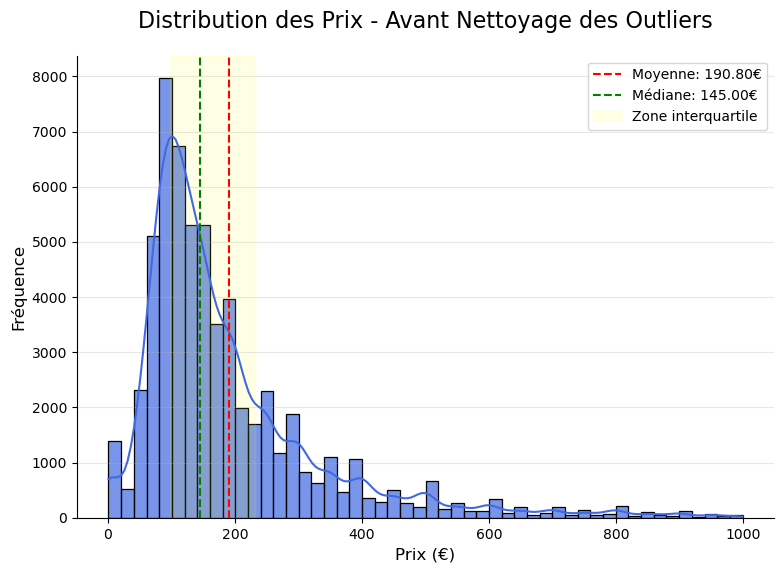

In [13]:
# Distribution des Prix
plt.figure(figsize=(9, 6))
ax = sns.histplot(df['price'], bins=50, kde=True, color='royalblue', alpha=0.7)
plt.title('Distribution des Prix - Avant Nettoyage des Outliers', fontsize=16, pad=20)
plt.xlabel('Prix (€)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Annotations
mean_price = df['price'].mean()
median_price = df['price'].median()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=1.5, label=f'Moyenne: {mean_price:.2f}€')
plt.axvline(median_price, color='green', linestyle='--', linewidth=1.5, label=f'Médiane: {median_price:.2f}€')

# Zone interquartile
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
plt.axvspan(Q1, Q3, color='yellow', alpha=0.1, label='Zone interquartile')

plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.show()

#### Matrice de Corrélation

In [14]:
# Matrice de Corrélation
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0}).astype(float)
print("\n=== Types de données après conversion ===")
print(df.dtypes)


=== Types de données après conversion ===
id                     int64
listing_url           object
scrape_id              int64
last_scraped          object
source                object
                      ...   
reviews_per_month    float64
TV                   float64
Wifi                 float64
Dryer                float64
Kitchen              float64
Length: 79, dtype: object


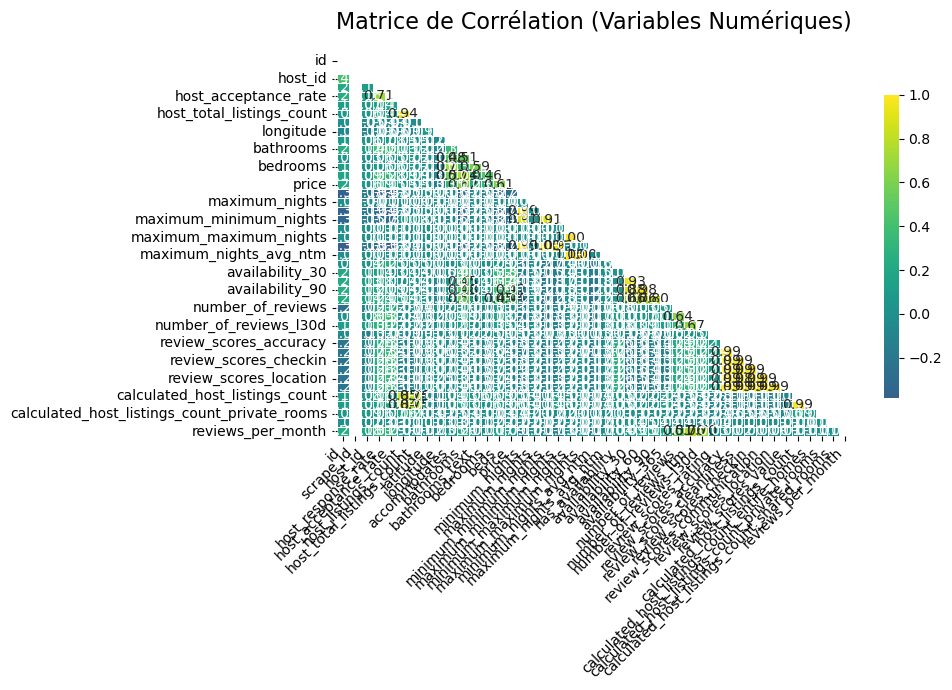

In [15]:
# Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Suppression des colonnes vides ou quasi vides
df_numeric = df_numeric.dropna(axis=1, how='all')  # Supprime les colonnes entièrement vides
df_numeric = df_numeric.fillna(0)  # Remplace les NaN restants par 0

# Calcul de la matrice de corrélation
corr = df_numeric.corr()

# Vérification s'il y a des données valides à afficher
if corr.isnull().all().all():
    print("Aucune donnée numérique valide pour générer la heatmap.")
else:
    # Masque pour le triangle supérieur
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Affichage de la heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr, mask=mask, annot=True, cmap='viridis', center=0, 
                fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8},
                annot_kws={'size': 10})

    plt.title('Matrice de Corrélation (Variables Numériques)', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    

#### Relation Prix vs Variables Clés

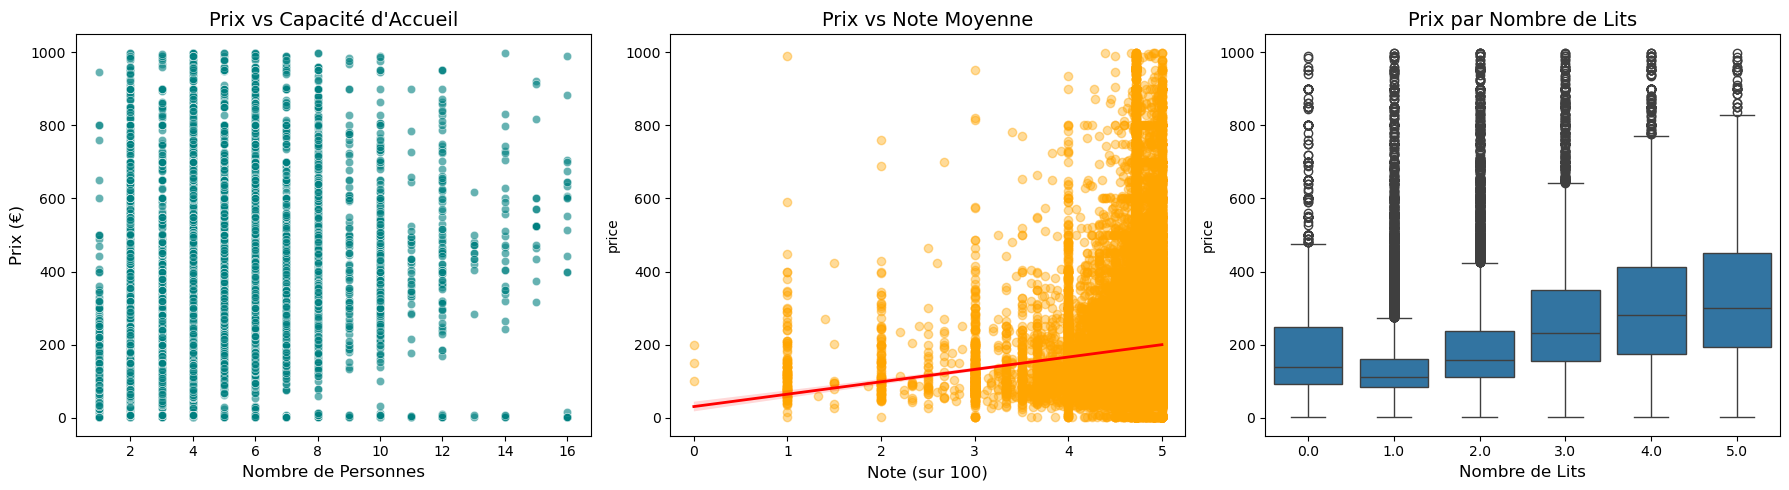

In [16]:
# Configuration des subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Prix vs Capacité d'accueil
sns.scatterplot(ax=axes[0], x='accommodates', y='price', data=df, alpha=0.6, color='teal')
axes[0].set_title('Prix vs Capacité d\'Accueil', fontsize=14)
axes[0].set_xlabel('Nombre de Personnes', fontsize=12)
axes[0].set_ylabel('Prix (€)', fontsize=12)

# Prix vs Note moyenne
sns.regplot(ax=axes[1], x='review_scores_rating', y='price', data=df, 
            scatter_kws={'alpha':0.4, 'color':'orange'}, 
            line_kws={'color':'red', 'linewidth':2})
axes[1].set_title('Prix vs Note Moyenne', fontsize=14)
axes[1].set_xlabel('Note (sur 100)', fontsize=12)

# Prix vs Nombre de lits
sns.boxplot(ax=axes[2], x='beds', y='price', data=df[df['beds'] <= 5])
axes[2].set_title('Prix par Nombre de Lits', fontsize=14)
axes[2].set_xlabel('Nombre de Lits', fontsize=12)

plt.tight_layout()
plt.show()


#### Analyse de la Disponibilité

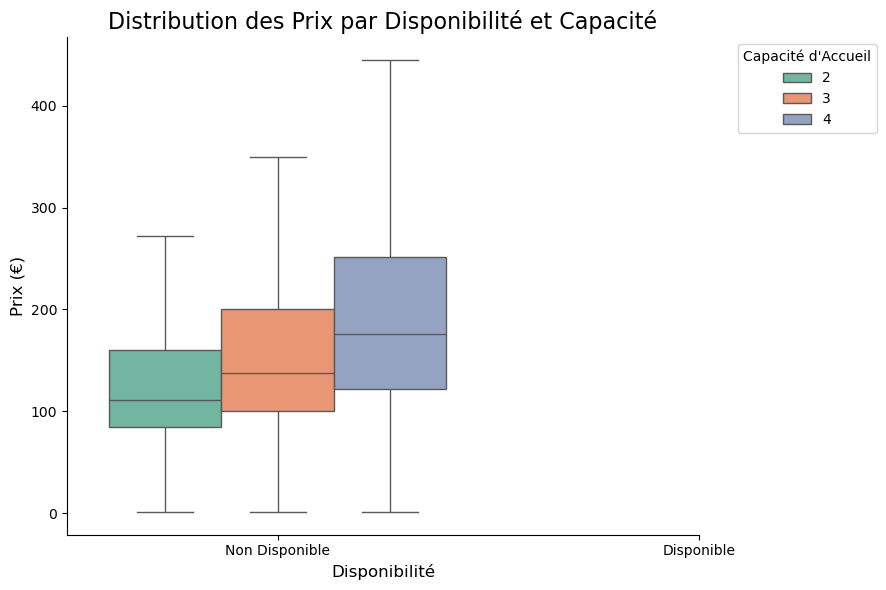

In [17]:
# Analyse de la Disponibilité
plt.figure(figsize=(9, 6))

# Boxplot avec hue pour une variable supplémentaire
sns.boxplot( y='price', hue='accommodates', 
            data=df[df['accommodates'].astype(int).between(2, 4)],
            palette='Set2', showfliers=False)

plt.title('Distribution des Prix par Disponibilité et Capacité', fontsize=16)
plt.xlabel('Disponibilité', fontsize=12)
plt.ylabel('Prix (€)', fontsize=12)

# Adapter les labels des ticks pour éviter une erreur
plt.xticks(ticks=[0, 1], labels=['Non Disponible', 'Disponible'])

plt.legend(title='Capacité d\'Accueil', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()
plt.tight_layout()
plt.show()


#### Gestion des Outliers (Valeurs Aberrantes)

In [18]:
# Méthode IQR pour filtrer
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

#### Visualisation après nettoyage


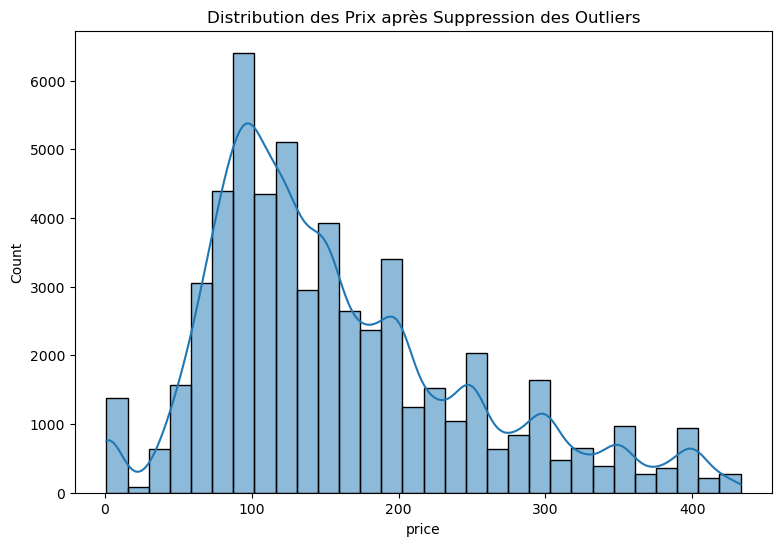

In [19]:
plt.figure(figsize=(9, 6))
sns.histplot(df_clean['price'], bins=30, kde=True)
plt.title('Distribution des Prix après Suppression des Outliers')
plt.show()

In [20]:
# Suppression des outliers sur plusieurs colonnes
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

for col in ['accommodates', 'reviews_per_month', 'beds', 'bathrooms_text']:
    df_clean = remove_outliers(df_clean, col)

print(f"Nouvelle taille du dataset après suppression des outliers : {df_clean.shape}")


Nouvelle taille du dataset après suppression des outliers : (43548, 79)


Score R² du modèle : -562258572941827456.0000


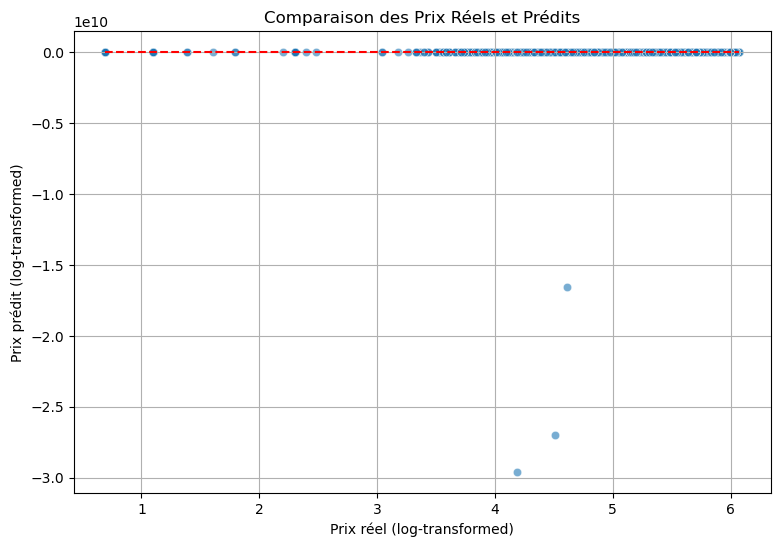

MAE: 8393176.83, RMSE: 464220440.09


['model_airbnb.pkl']

In [28]:
# Séparation des features et de la target
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# Identification des variables catégorielles
cat_features = X.select_dtypes(include=['object']).columns

# Réduction du nombre de catégories (fusion des valeurs rares)
for col in cat_features:
    top_categories = X[col].value_counts().index[:10]  # Garde les 10 plus fréquentes
    X[col] = X[col].apply(lambda x: x if x in top_categories else "Autre")

# Encodage des variables catégorielles
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_features])

# Convertir en DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# Concaténer avec les variables numériques
X = pd.concat([X.select_dtypes(exclude=['object']).reset_index(drop=True), 
               X_encoded.reset_index(drop=True)], axis=1)

# Supprimer les colonnes 100% NaN
X = X.dropna(axis=1, how='all')

# Gestion des valeurs manquantes : Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Appliquer un log pour stabiliser la variance des prix
y = np.log1p(y)

# Normalisation des données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
r2 = r2_score(y_test, y_pred)
print(f"Score R² du modèle : {r2:.4f}")

# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(9, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Prix réel (log-transformed)")
plt.ylabel("Prix prédit (log-transformed)")
plt.title("Comparaison des Prix Réels et Prédits")
plt.grid(True)
plt.show()

# Calcul de l'erreur MAE et RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Sauvegarde du modèle pour une réutilisation future
joblib.dump(model, "model_airbnb.pkl")

